# Data Wrangling for [Recruit Restaurant Visitor Forecasting](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting)
------

## 1. Load data

In [419]:
import pandas as pd

ar_reserve_df = pd.read_csv('data/air_reserve.csv')
ar_store_df = pd.read_csv('data/air_store_info.csv')
ar_visit_df = pd.read_csv('data/air_visit_data.csv')

h_reserve_df = pd.read_csv('data/hpg_reserve.csv')
h_store_df = pd.read_csv('data/hpg_store_info.csv')

date_info_df = pd.read_csv('data/date_info.csv')
store_ids_df = pd.read_csv('data/store_id_relation.csv')

---
## 2. Visual inspection

In [420]:
from IPython.display import display

def visual_inspect(df):
    print('>>> Shape   =', df.shape)
    print('>>> Columns =', df.columns)
    print('\n>>> Info')
    df.info()
    print('\n>>> Head')
    display(df.head())
    print('\n>>> Tail')
    display(df.tail())
    print('\n>>> Total sum of missing values:', df.isnull().sum().sum())

### 2.1 Inspecting air_reserve.csv

In [421]:
visual_inspect(ar_reserve_df)

>>> Shape   = (92378, 4)
>>> Columns = Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null object
reserve_datetime    92378 non-null object
reserve_visitors    92378 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.8+ MB

>>> Head


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5



>>> Tail


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3



>>> Total sum of missing values: 0


### 2.2 Inspecting air_store_info.csv

In [422]:
visual_inspect(ar_store_df)

>>> Shape   = (829, 5)
>>> Columns = Index(['air_store_id', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude'],
      dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB

>>> Head


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599



>>> Tail


,air_store_id,air_genre_name,air_area_name,latitude,longitude
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956
828,air_c8fe396d6c46275d,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956



>>> Total sum of missing values: 0


### 2.3 Inspecting air_visit_data.csv

In [423]:
visual_inspect(ar_visit_df)

>>> Shape   = (252108, 3)
>>> Columns = Index(['air_store_id', 'visit_date', 'visitors'], dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.8+ MB

>>> Head


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6



>>> Tail


,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5



>>> Total sum of missing values: 0


### 2.4 Inspecting hpg_reserve.csv

In [424]:
visual_inspect(h_reserve_df)

>>> Shape   = (2000320, 4)
>>> Columns = Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors    int64
dtypes: int64(1), object(3)
memory usage: 61.0+ MB

>>> Head


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13



>>> Tail


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9
2000319,hpg_0b70de808b55ad1e,2017-05-31 23:00:00,2017-04-21 13:00:00,6



>>> Total sum of missing values: 0


### Unfortunately, a DataFrame with > 2M observations is too big for info() to do it's job properly. We can check each column individually for null values:

In [425]:
# When a test returns True it means that there are null values on that particular column
print("Are there any NULL values on these columns?")
#print('hpg_store_id     =', h_reserve_df['hpg_store_id'].isnull().values.any())
#print('visit_datetime   =', h_reserve_df['visit_datetime'].isnull().values.any())
#print('reserve_datetime =', h_reserve_df['reserve_datetime'].isnull().values.any())
#print('reserve_visitors =', h_reserve_df['reserve_visitors'].isnull().values.any())
# or the short version of the code above:
print(pd.isnull(h_reserve_df).any())

# In case we need to count how many nulls there are:
print("\nHow many NULL values are there?")
print('hpg_store_id     =', h_reserve_df['hpg_store_id'].isnull().sum())
print('visit_datetime   =', h_reserve_df['visit_datetime'].isnull().sum())
print('reserve_datetime =', h_reserve_df['reserve_datetime'].isnull().sum())
print('reserve_visitors =', h_reserve_df['reserve_visitors'].isnull().sum())

Are there any NULL values on these columns?
hpg_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

How many NULL values are there?
hpg_store_id     = 0
visit_datetime   = 0
reserve_datetime = 0
reserve_visitors = 0


### 2.5 Inspecting hpg_store_info.csv

In [426]:
visual_inspect(h_store_df)

>>> Shape   = (4690, 5)
>>> Columns = Index(['hpg_store_id', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude'],
      dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
hpg_store_id      4690 non-null object
hpg_genre_name    4690 non-null object
hpg_area_name     4690 non-null object
latitude          4690 non-null float64
longitude         4690 non-null float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB

>>> Head


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221



>>> Tail


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.666137,139.733978
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.730068,139.711742
4689,hpg_11801306ce8bfb4f,Udon/Soba,Osaka Prefecture Osaka None,34.701519,135.498859



>>> Total sum of missing values: 0


### 2.6 Inspecting date_info.csv

In [427]:
visual_inspect(date_info_df)

>>> Shape   = (517, 3)
>>> Columns = Index(['calendar_date', 'day_of_week', 'holiday_flg'], dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
calendar_date    517 non-null object
day_of_week      517 non-null object
holiday_flg      517 non-null int64
dtypes: int64(1), object(2)
memory usage: 12.2+ KB

>>> Head


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0



>>> Tail


,calendar_date,day_of_week,holiday_flg
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0
516,2017-05-31,Wednesday,0



>>> Total sum of missing values: 0


### 2.7 Inspecting store_id_relation.csv

In [428]:
visual_inspect(store_ids_df)

>>> Shape   = (150, 2)
>>> Columns = Index(['air_store_id', 'hpg_store_id'], dtype='object')

>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
air_store_id    150 non-null object
hpg_store_id    150 non-null object
dtypes: object(2)
memory usage: 2.4+ KB

>>> Head


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7



>>> Tail


,air_store_id,hpg_store_id
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19
149,air_465bddfed3353b23,hpg_23c5945dc1a72454



>>> Total sum of missing values: 0


### Since there are no null values in these dataframes, there is no need to drop rows or fill missing values.
---

### 3. Visual Exploratory Data Analysis

#### 3.1 EDA for air_reserve.csv

In [429]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# debug: cut the size of the dataframe for 10 rows
#ar_reserve_df = ar_reserve_df.head(10)
#print(ar_reserve_df.head(10))
#print('-----------')

ar_reserve_df.describe()

# convert visit_datetime strings to proper datetime objects
ar_reserve_df['visit_datetime'] = pd.to_datetime(ar_reserve_df['visit_datetime'])
print(">>> Min date:", ar_reserve_df.visit_datetime.min())
print(">>> Max date:", ar_reserve_df.visit_datetime.max())

# compute the number of unique days:
print(">>> Number of days:", len(ar_reserve_df['visit_datetime'].dt.normalize().value_counts().index))

>>> Min date: 2016-01-01 19:00:00
>>> Max date: 2017-05-31 21:00:00
>>> Number of days: 433


<a list of 75 Text xticklabel objects>


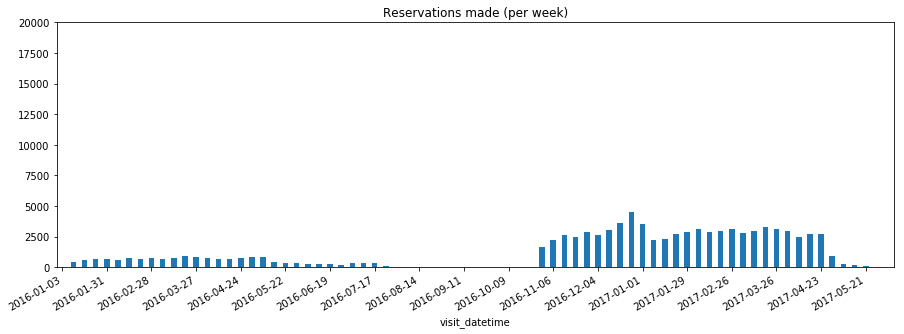

In [430]:
# set new index so resample works by date
ar_reserve_df.set_index(ar_reserve_df["visit_datetime"], inplace=True)

ar_reserve_week = ar_reserve_df.resample('W').apply({'reserve_visitors':'count'})   # 75 rows
#display(ar_reserve_week.head())

fig, ax = plt.subplots(figsize=(15,5))
ar_reserve_week.plot(kind='bar', title='Reservations made (per week)', ax=ax, legend=None)

# setup axis limits
axes = plt.gca()
axes.set_ylim([0,20000])

# show every Nth label (N = 4 means 4 weeks)
locs, labels = plt.xticks()
print(labels)
N = 4
plt.xticks(locs[::N], ar_reserve_week.index[::N].strftime('%Y-%m-%d'))

# autorotate the xlabels
fig.autofmt_xdate()

plt.show()

<a list of 7 Text xticklabel objects>


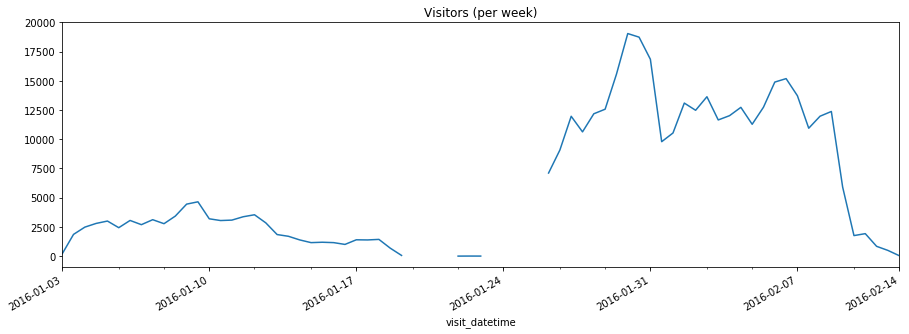

In [431]:
from matplotlib.ticker import MaxNLocator,IndexFormatter
#TODO: this chart's ticks are not in sync with the data. WHY?!

ar_visitors_week = ar_reserve_df.resample('W').apply({'reserve_visitors':'sum'})    # 517 rows
#display(ar_visitors_week.head(10))

fig, ax = plt.subplots(figsize=(15,5))
#ax.xaxis.set_major_locator(MaxNLocator(11))
#ax.xaxis.set_major_formatter(IndexFormatter(ar_visitors_week.index)) # <-- new here
ar_visitors_week.plot(ax=ax, title='Visitors (per week)', legend=None)

# show every Nth label (N = 4 means 4 weeks)
locs, labels = plt.xticks()
print(labels)
N = 1
plt.xticks(locs[::N], ar_visitors_week.index[::N].strftime('%Y-%m-%d'))

# autorotate the xlabels
fig.autofmt_xdate()
plt.show()

#### 3.2 EDA for air_store_info.csv

In [432]:
ar_store_df.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


#### 3.3 Summary statistics for air_visit_data.csv

In [433]:
ar_visit_df.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


#### 3.4 Summary statistics for hpg_reserve.csv

In [434]:
h_reserve_df.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


#### 3.5 Summary statistics for hpg_store_info.csv

In [435]:
h_store_df.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


#### 3.6 Summary statistics for date_info.csv

In [436]:
date_info_df.describe()

,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### 3.7 Summary statistics for store_id_relation.csv

In [437]:
store_ids_df.describe()

,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_900d755ebd2f7bbd,hpg_da3fb5d63e69a5fa
freq,1,1
